In [71]:
!wget -q http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar

In [72]:
!tar -xvf VOCtrainval_06-Nov-2007.tar > /dev/null; echo " done."

 done.


In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

In [7]:
df = pd.read_pickle("/content/PASCAL_VOC_labels.p")
df.head(10)

,file_name,category,cat_id,bbox
0,12,car,7,"[96, 155, 269, 350]"
1,17,horse,13,"[77, 89, 335, 402]"
2,23,person,15,"[1, 2, 461, 242]"
3,26,car,7,"[124, 89, 211, 336]"
4,32,aeroplane,1,"[77, 103, 182, 374]"
5,33,aeroplane,1,"[106, 8, 262, 498]"
6,34,train,19,"[166, 115, 399, 359]"
7,35,person,15,"[97, 217, 317, 464]"
8,36,dog,12,"[78, 26, 343, 318]"
9,42,train,19,"[31, 262, 294, 499]"


In [9]:
df.tail()

,file_name,category,cat_id,bbox
2496,9944,motorbike,14,"[119, 86, 290, 328]"
2497,9945,sheep,17,"[198, 91, 228, 131]"
2498,9949,person,15,"[89, 24, 311, 426]"
2499,9959,car,7,"[141, 191, 186, 329]"
2500,9961,dog,12,"[3, 68, 344, 391]"


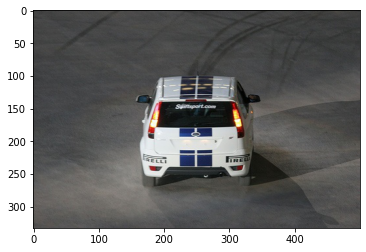

In [50]:
main_folder = "/content/VOCdevkit/VOC2007/JPEGImages/"
img = plt.imread(main_folder + "0000"+str(df['file_name'][0])+".jpg")
plt.imshow(img)
plt.show()

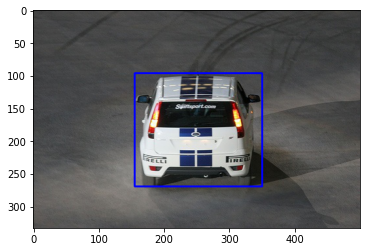

In [49]:
bb = df['bbox'][0]
import cv2
cv2.rectangle(img,(bb[1],bb[0]),(bb[3],bb[2]),[0,0,255],2)
plt.imshow(img)
plt.show()

In [14]:
df.shape

(2501, 4)

In [15]:
import imgaug as ig
from imgaug import augmenters as ag

In [17]:
bb

array([ 96, 155, 269, 350])

In [51]:
aug1 = ag.Resize({"height":150,"width":150}).to_deterministic()
bb_old = ig.BoundingBoxesOnImage([ig.BoundingBox(x1 =bb[1],y1=bb[0],x2=bb[3],y2=bb[2])],shape=img.shape)
img_ag = aug1.augment_images([img])[0]
bb_ag = aug1.augment_bounding_boxes([bb_old])[0]
bb_ag

BoundingBoxesOnImage([BoundingBox(x1=46.5000, y1=43.2432, x2=105.0000, y2=121.1712, label=None)], shape=(150, 150, 3))

In [52]:
print(img.shape)
print(bb)
print(img_ag.shape)
print(bb_ag.bounding_boxes)

(333, 500, 3)
[ 96 155 269 350]
(150, 150, 3)
[BoundingBox(x1=46.5000, y1=43.2432, x2=105.0000, y2=121.1712, label=None)]


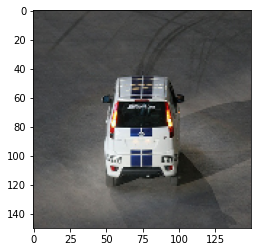

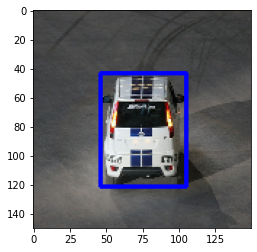

In [53]:
plt.imshow(img_ag)
plt.show()
cv2.rectangle(img_ag,(bb_ag.bounding_boxes[0].x1,bb_ag.bounding_boxes[0].y1),(bb_ag.bounding_boxes[0].x2,bb_ag.bounding_boxes[0].y2),[0,0,255],2)
plt.imshow(img_ag)
plt.show()

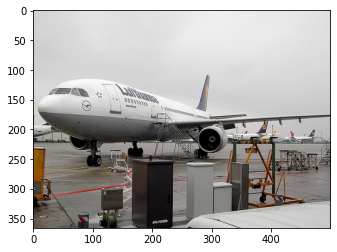

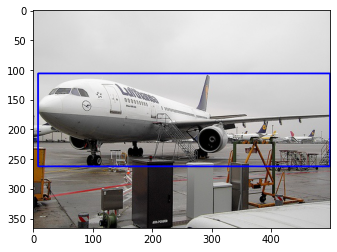

In [37]:
img = plt.imread(main_folder + "0000"+str(df['file_name'][5])+".jpg")
plt.imshow(img)
plt.show()
img2 = img.copy()
bb = df['bbox'][5]
cv2.rectangle(img,(bb[1],bb[0]),(bb[3],bb[2]),[0,0,255],2)
plt.imshow(img)
plt.show()

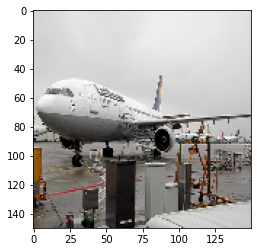

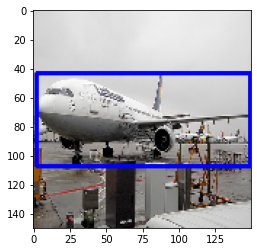

In [39]:
aug1 = ag.Resize({"height":150,"width":150}).to_deterministic()
bb_old = ig.BoundingBoxesOnImage([ig.BoundingBox(x1 =bb[1],y1=bb[0],x2=bb[3],y2=bb[2])],shape=img.shape)
img_ag = aug1.augment_images([img2])[0]
bb_ag = aug1.augment_bounding_boxes([bb_old])[0]
plt.imshow(img_ag)
plt.show()
cv2.rectangle(img_ag,(bb_ag.bounding_boxes[0].x1,bb_ag.bounding_boxes[0].y1),(bb_ag.bounding_boxes[0].x2,bb_ag.bounding_boxes[0].y2),[0,0,255],2)
plt.imshow(img_ag)
plt.show()

In [90]:
def augment(img,bb):
  aug1 = ag.Resize({"height":150,"width":150}).to_deterministic()
  bb_old = ig.BoundingBoxesOnImage([ig.BoundingBox(x1 =bb[1],y1=bb[0],x2=bb[3],y2=bb[2])],shape=img.shape)
  img_ag = aug1.augment_images([img])[0]
  bb_ag = aug1.augment_bounding_boxes([bb_old])[0]
  bb_out = [bb_ag.bounding_boxes[0].x1,bb_ag.bounding_boxes[0].y1,bb_ag.bounding_boxes[0].x2,bb_ag.bounding_boxes[0].y2]
  return img_ag,bb_out


# Dataset Preparation

In [55]:
df.head()

,file_name,category,cat_id,bbox
0,12,car,7,"[96, 155, 269, 350]"
1,17,horse,13,"[77, 89, 335, 402]"
2,23,person,15,"[1, 2, 461, 242]"
3,26,car,7,"[124, 89, 211, 336]"
4,32,aeroplane,1,"[77, 103, 182, 374]"


In [57]:
categories = df['category'].unique()
categories

array(['car', 'horse', 'person', 'aeroplane', 'train', 'dog', 'chair',
       'boat', 'bird', 'pottedplant', 'cat', 'sofa', 'motorbike',
       'tvmonitor', 'bus', 'sheep', 'diningtable', 'bottle', 'cow',
       'bicycle'], dtype=object)

In [59]:
sorted(df['cat_id'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [60]:
df['cat_id'] = df['cat_id']-1


In [61]:
df.head()

,file_name,category,cat_id,bbox
0,12,car,6,"[96, 155, 269, 350]"
1,17,horse,12,"[77, 89, 335, 402]"
2,23,person,14,"[1, 2, 461, 242]"
3,26,car,6,"[124, 89, 211, 336]"
4,32,aeroplane,0,"[77, 103, 182, 374]"


In [62]:
df['file_name'] = df['file_name'].astype(str)
df['file_name'] = df['file_name'].str.zfill(6)
df.head()

,file_name,category,cat_id,bbox
0,000012,car,6,"[96, 155, 269, 350]"
1,000017,horse,12,"[77, 89, 335, 402]"
2,000023,person,14,"[1, 2, 461, 242]"
3,000026,car,6,"[124, 89, 211, 336]"
4,000032,aeroplane,0,"[77, 103, 182, 374]"


In [67]:
from tensorflow.keras.applications import resnet50

In [69]:
df.shape

(2501, 4)

In [73]:
import os
len(os.listdir(main_folder))

5011

In [91]:
x = []
y1 = []
y2 = []

for i in range(df.shape[0]):
  img = image.load_img(main_folder+df['file_name'][i]+".jpg")
  img = image.img_to_array(img)
  img,bb = augment(img,df['bbox'][i])
  img = resnet50.preprocess_input(img)
  x.append(img)
  y1.append(df['cat_id'][i])
  y2.append(bb)
  



In [92]:
x = np.array(x)
print(x.shape)
y1 = to_categorical(y1)
print(y1.shape)
y2 = np.array(y2)
print(y2.shape)

(2501, 150, 150, 3)
(2501, 20)
(2501, 4)


# Modelling the CNN for object localization

In [93]:
from tensorflow.keras import models,layers

In [94]:
input_layer = layers.Input(shape=(150,150,3))
resmodel = resnet50.ResNet50(weights='imagenet',input_tensor=input_layer,include_top=False)

for layer in resmodel.layers[:-5]:
  layer.trainable=False

last_layer = resmodel.layers[-1].output
#add a flatten layer
flatten = layers.Flatten()(last_layer)

# classification segment
out1 = layers.Dropout(0.5)(flatten)
out1 = layers.Dense(128,activation='relu')(out1)
out1 = layers.Dense(20,activation='softmax',name='classes')(out1)

# regression segment for bounding box
out2 = layers.Dropout(0.5)(flatten)
out2 = layers.Dense(128,activation='relu')(out2)
out2 = layers.Dense(4,activation='relu',name='bbox')(out2)

model = models.Model(inputs=input_layer,outputs = [out1,out2])

In [95]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

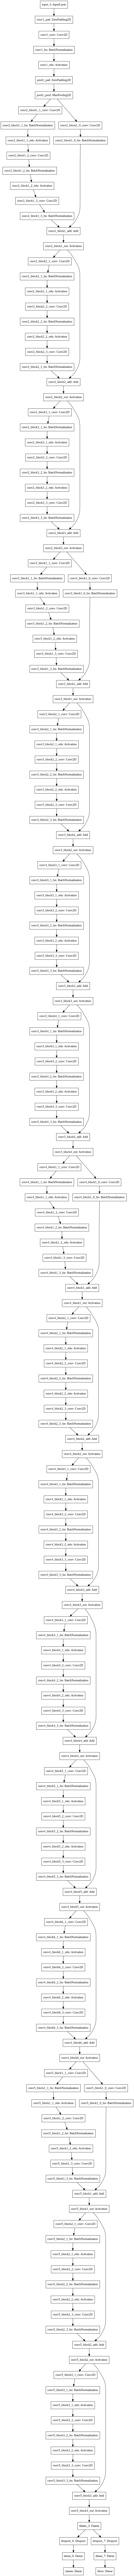

In [96]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [97]:
model.compile(optimizer='adam',metrics={'classes':'accuracy'},loss={'classes':'categorical_crossentropy',
                                                                    'bbox':'mae'},
              loss_weights={'bbox':1,'classes':4})
model.fit(x=x,y=[y1,y2],epochs=20,batch_size=64,shuffle=True,validation_split=0.2)

Epoch 1/20
32/32 [==============================] - 6s 174ms/step - loss: 40.8225 - classes_loss: 3.3877 - bbox_loss: 27.2717 - classes_accuracy: 0.4600 - val_loss: 25.8458 - val_classes_loss: 1.4868 - val_bbox_loss: 19.8985 - val_classes_accuracy: 0.6347
Epoch 2/20
32/32 [==============================] - 4s 136ms/step - loss: 18.8769 - classes_loss: 0.6132 - bbox_loss: 16.4241 - classes_accuracy: 0.8130 - val_loss: 25.7309 - val_classes_loss: 1.3372 - val_bbox_loss: 20.3820 - val_classes_accuracy: 0.6806
Epoch 3/20
32/32 [==============================] - 4s 137ms/step - loss: 14.4310 - classes_loss: 0.2327 - bbox_loss: 13.5004 - classes_accuracy: 0.9250 - val_loss: 23.7147 - val_classes_loss: 1.5267 - val_bbox_loss: 17.6080 - val_classes_accuracy: 0.6747
Epoch 4/20
32/32 [==============================] - 4s 137ms/step - loss: 12.3672 - classes_loss: 0.1004 - bbox_loss: 11.9657 - classes_accuracy: 0.9635 - val_loss: 22.7519 - val_classes_loss: 1.4289 - val_bbox_loss: 17.0363 - val_c

In [103]:
def predict(img_name):
  img = image.load_img(img_name,target_size=(150,150))
  img = image.img_to_array(img)
  img2 = img.copy()
  img = resnet50.preprocess_input(img)
  predictions = model.predict(img.reshape(1,150,150,3))
  class_id = np.argmax(predictions[0])
  print(df['category'][df['cat_id']==class_id].unique())
  bb = predictions[1][0]
  print(bb)
  cv2.rectangle(img2,(bb[0],bb[1]),(bb[2],bb[3]),[0,0,255],2)
  plt.imshow(img2.astype('int32'))
  plt.show()



In [109]:
!wget -q https://media.thetab.com/blogs.dir/44/files/2019/06/plant-grass-colthorse-human-person-horse-mammal-animal-940x480.jpeg

['horse']
[ 35.698288  17.418337 119.30221  137.11092 ]


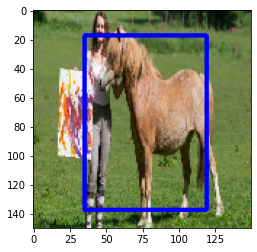

In [110]:
predict("plant-grass-colthorse-human-person-horse-mammal-animal-940x480.jpeg")